# THE UNLUCKIEST BATTERS IN IPL HISTORY

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('C:/Users/Dell/Downloads/all_season_batting_card.csv/all_season_batting_card.csv')

In [5]:
df.head()

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
0,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0.0,0.0,16.66,False,False,"{'wickets': 1, 'runs': 14}",2.2,b Mohammed Shami,<strong>Shami breaches the defences of Conway<...,NaN
1,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,4.0,9.0,184.00,False,False,"{'wickets': 5, 'runs': 151}",17.1,c Shubman Gill b Joseph,"Joseph misses the yorker, but is still a hard-...",NaN
2,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,4.0,1.0,135.29,False,False,"{'wickets': 2, 'runs': 50}",5.5,c &dagger;Saha b Rashid Khan,"<strong>Rashid strikes back, Moeen has nicked ...",NaN
3,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,1.0,0.0,116.66,False,False,"{'wickets': 3, 'runs': 70}",7.4,c &dagger;Saha b Rashid Khan,<strong>Rashid takes out both Moeen and Stokes...,NaN
4,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,0.0,1.0,100.00,False,False,"{'wickets': 4, 'runs': 121}",12.5,b Little,Maiden IPL wicket for Josh Little. Rayudu dash...,NaN


In [7]:
df.info

<bound method DataFrame.info of        season  match_id match_name home_team away_team  \
0      2023.0   1359475   GT v CSK        GT       CSK   
1      2023.0   1359475   GT v CSK        GT       CSK   
2      2023.0   1359475   GT v CSK        GT       CSK   
3      2023.0   1359475   GT v CSK        GT       CSK   
4      2023.0   1359475   GT v CSK        GT       CSK   
...       ...       ...        ...       ...       ...   
15715  2008.0    336040   CSK v RR       CSK        RR   
15716  2008.0    336040   CSK v RR       CSK        RR   
15717  2008.0    336040   CSK v RR       CSK        RR   
15718  2008.0    336040   CSK v RR       CSK        RR   
15719  2008.0    336040   CSK v RR       CSK        RR   

                                          venue       city country  \
0      Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   
1      Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   India   
2      Narendra Modi Stadium, Motera, Ahmedabad  Ahmedabad   

In [8]:
df.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain', 'isNotOut', 'runningScore', 'runningOver', 'shortText',
       'commentary', 'link'],
      dtype='object')

In [16]:
df['season'] = pd.to_numeric(df['season'], errors='coerce')
years_covered = df['season'].dropna().unique()  
sorted(years_covered)

[2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0,
 2022.0,
 2023.0]

In [18]:
df['runs'] = pd.to_numeric(df['runs'], errors='coerce')
df['strikeRate'] = pd.to_numeric(df['strikeRate'], errors='coerce')
df['isNotOut'] = df['isNotOut'].astype(str).str.lower().map({'true': True, 'false': False})
df['runningScore'] = pd.to_numeric(df['runningScore'], errors='coerce')
df['runningOver'] = pd.to_numeric(df['runningOver'], errors='coerce')
nervous_90s = df[(df['runs'].between(90, 99)) & (df['isNotOut'] == False)]
nervous_90s_counts = nervous_90s['fullName'].value_counts().reset_index()
nervous_90s_counts.columns = ['Batter', 'Times Out in 90s']
high_sr_not_out = df[(df['isNotOut'] == True) & (df['strikeRate'] > 150)]
nervous_90s_counts.head(), high_sr_not_out.head()

(            Batter  Times Out in 90s
 0    Glenn Maxwell                 3
 1     David Warner                 3
 2  Ruturaj Gaikwad                 2
 3      Chris Gayle                 2
 4   Faf du Plessis                 2,
     season  match_id  match_name home_team away_team  \
 7   2023.0   1359475    GT v CSK        GT       CSK   
 15  2023.0   1359475    GT v CSK        GT       CSK   
 21  2023.0   1359476  PBKS v KKR      PBKS       KKR   
 22  2023.0   1359476  PBKS v KKR      PBKS       KKR   
 30  2023.0   1359476  PBKS v KKR      PBKS       KKR   
 
                                                 venue        city country  \
 7            Narendra Modi Stadium, Motera, Ahmedabad   Ahmedabad   India   
 15           Narendra Modi Stadium, Motera, Ahmedabad   Ahmedabad   India   
 21  Punjab Cricket Association IS Bindra Stadium, ...  Chandigarh   India   
 22  Punjab Cricket Association IS Bindra Stadium, ...  Chandigarh   India   
 30  Punjab Cricket Association IS Bi

In [10]:
nervous_90s_counts.head()

,Batter,Times Out in 90s
0,Glenn Maxwell,3
1,David Warner,3
2,Ruturaj Gaikwad,2
3,Chris Gayle,2
4,Faf du Plessis,2


In [11]:
high_sr_not_out.head()

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
7,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,CSK,1,...,1.0,1.0,200.00,True,True,{},NaN,not out,NaN,NaN
15,2023.0,1359475,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,GT,2,...,1.0,1.0,333.33,False,True,{},NaN,not out,NaN,NaN
21,2023.0,1359476,PBKS v KKR,PBKS,KKR,"Punjab Cricket Association IS Bindra Stadium, ...",Chandigarh,India,PBKS,1,...,0.0,2.0,152.94,False,True,{},NaN,not out,NaN,NaN
22,2023.0,1359476,PBKS v KKR,PBKS,KKR,"Punjab Cricket Association IS Bindra Stadium, ...",Chandigarh,India,PBKS,1,...,2.0,0.0,157.14,False,True,{},NaN,not out,NaN,NaN
30,2023.0,1359476,PBKS v KKR,PBKS,KKR,"Punjab Cricket Association IS Bindra Stadium, ...",Chandigarh,India,KKR,2,...,0.0,1.0,266.66,False,True,{},NaN,not out,NaN,NaN


##  THE CURSE OF THE NERVOUS 90s: SO CLOSE, YET SO FAR

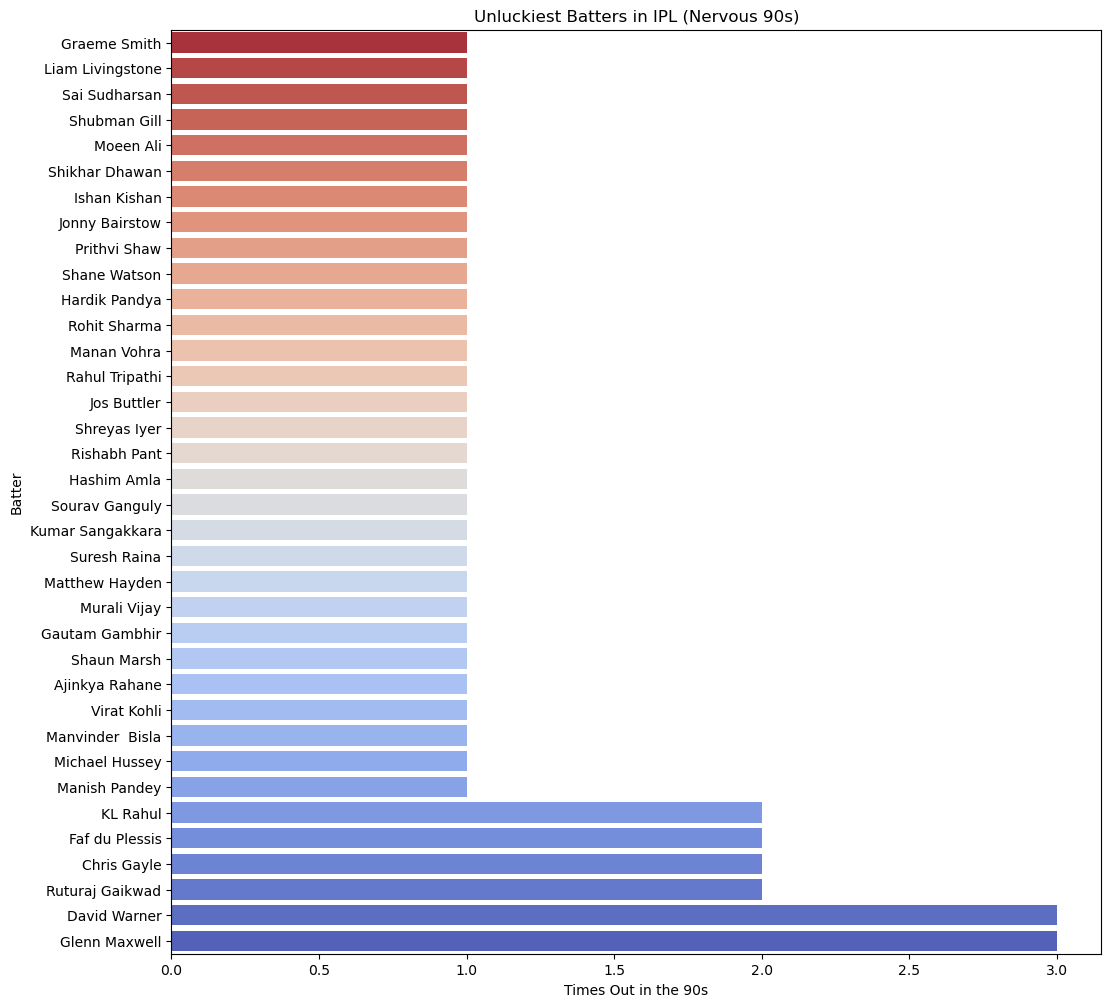

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.barplot(x=nervous_90s_counts['Times Out in 90s'], y=nervous_90s_counts['Batter'], palette="coolwarm")
plt.xlabel("Times Out in the 90s")
plt.ylabel("Batter")
plt.title("Unluckiest Batters in IPL (Nervous 90s)")
plt.gca().invert_yaxis()
plt.show()

## High Strike Rate, 50+ Runs, But Still Lost



In [30]:
df['strikeRate'] = pd.to_numeric(df['strikeRate'], errors='coerce')
df['runs'] = pd.to_numeric(df['runs'], errors='coerce')
df['ballsFaced'] = pd.to_numeric(df['ballsFaced'], errors='coerce')

df = df.dropna(subset=['strikeRate', 'runs', 'ballsFaced', 'fullName'])
lost_matches = df[(df['isNotOut'] == 1) & (df['strikeRate'] > 150) & (df['runs'] >= 50)]
top_lost_matches = lost_matches.nlargest(10, 'strikeRate')

C:\Users\Dell\AppData\Local\Temp\ipykernel_21812\2749060689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strikeRate'] = pd.to_numeric(df['strikeRate'], errors='coerce')
C:\Users\Dell\AppData\Local\Temp\ipykernel_21812\2749060689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runs'] = pd.to_numeric(df['runs'], errors='coerce')
C:\Users\Dell\AppData\Local\Temp\ipykernel_21812\2749060689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [32]:
top_lost_matches

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
1404,2022.0,1304060,KKR v MI,KKR,MI,"Maharashtra Cricket Association Stadium, Pune",Pune,India,KKR,2,...,4.0,6.0,373.33,False,True,NaN,NaN,not out,NaN,NaN
7265,2016.0,980947,MI v KKR,MI,KKR,"Wankhede Stadium, Mumbai",Mumbai,India,MI,2,...,2.0,6.0,300.00,False,True,NaN,NaN,not out,NaN,NaN
4205,2019.0,1175358,MI v DC,MI,DC,"Wankhede Stadium, Mumbai",Mumbai,India,DC,1,...,7.0,7.0,288.88,False,True,NaN,NaN,not out,NaN,NaN
3950,2020.0,1216541,RR v MI,RR,MI,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,MI,1,...,2.0,7.0,285.71,False,True,NaN,NaN,not out,NaN,NaN
8803,2014.0,729291,RR v KXIP,RR,KXIP,Sharjah Cricket Stadium,Sharjah,United Arab Emirates,KXIP,2,...,0.0,6.0,268.42,False,True,NaN,NaN,not out,NaN,NaN
2875,2021.0,1254084,MI v CSK,MI,CSK,"Arun Jaitley Stadium, Delhi",Delhi,India,CSK,1,...,4.0,7.0,266.66,False,True,NaN,NaN,not out,NaN,NaN
10389,2013.0,598064,KXIP v RCB,KXIP,RCB,"Punjab Cricket Association IS Bindra Stadium, ...",Chandigarh,India,KXIP,2,...,8.0,7.0,265.78,False,True,NaN,NaN,not out,NaN,NaN
10084,2013.0,598027,RCB v PWI,RCB,PWI,"M.Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,...,13.0,17.0,265.15,False,True,NaN,NaN,not out,NaN,NaN
204,2023.0,1359487,GT v KKR,GT,KKR,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,GT,1,...,4.0,5.0,262.50,False,True,NaN,NaN,not out,NaN,NaN
11249,2012.0,548336,RR v RCB,RR,RCB,"Sawai Mansingh Stadium, Jaipur",Jaipur,India,RCB,1,...,3.0,5.0,256.52,False,True,NaN,NaN,not out,NaN,NaN


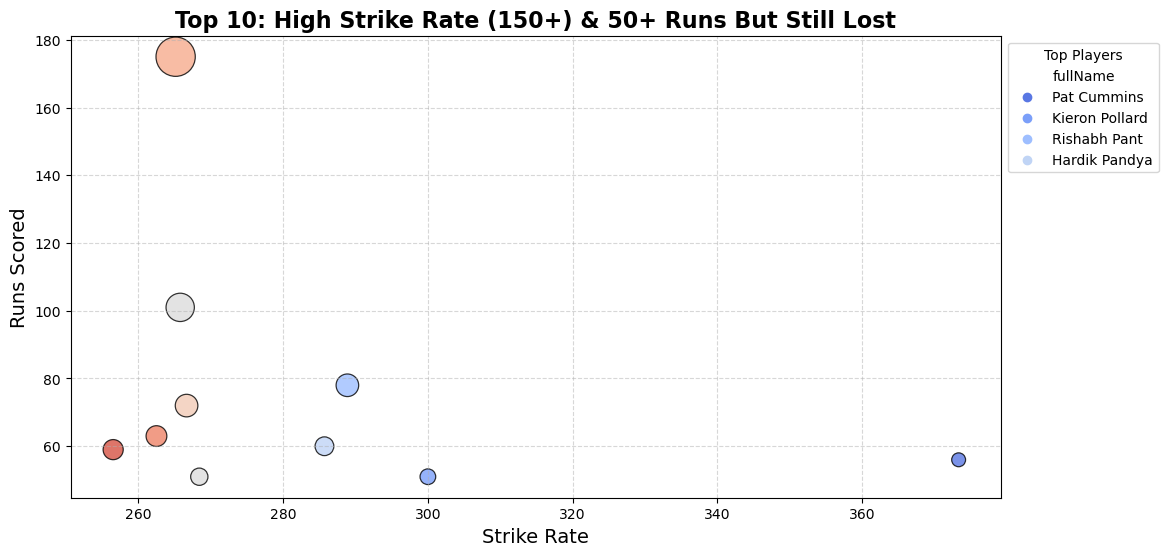

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bubble = sns.scatterplot(
    x=top_lost_matches['strikeRate'], 
    y=top_lost_matches['runs'], 
    size=top_lost_matches['ballsFaced'], 
    hue=top_lost_matches['fullName'], 
    palette="coolwarm",  # Better color distinction
    sizes=(100, 800),  # Control bubble sizes
    alpha=0.8, 
    edgecolor="black"
)

handles, labels = bubble.get_legend_handles_labels()
if handles:
    plt.legend(handles[:5], labels[:5], title="Top Players", bbox_to_anchor=(1, 1), loc="upper left")  # Show only top 5 in legend

plt.title("Top 10: High Strike Rate (150+) & 50+ Runs But Still Lost", fontsize=16, fontweight='bold')
plt.xlabel("Strike Rate", fontsize=14)
plt.ylabel("Runs Scored", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Conclusion

Cricket is a game of fine margins, and these unlucky batters proved that even the best performances don’t always guarantee victory. Scoring at a **blazing strike rate** and staying **not out** should mean success, but as we’ve seen, sometimes even heroic efforts aren’t enough.

Whether it’s falling in the **nervous 90s** or smashing boundaries in vain, IPL history is full of heartbreaks. These players gave it their all, but fate had other plans.

🔎 **Who do you think is the unluckiest IPL batter? Share your thoughts!** 🏏
